# Decision Tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

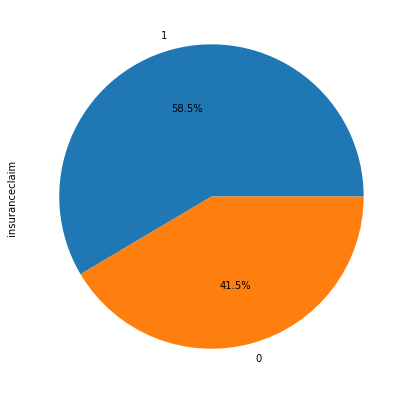

In [5]:
plt.figure(figsize=(7,7))
df["insuranceclaim"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

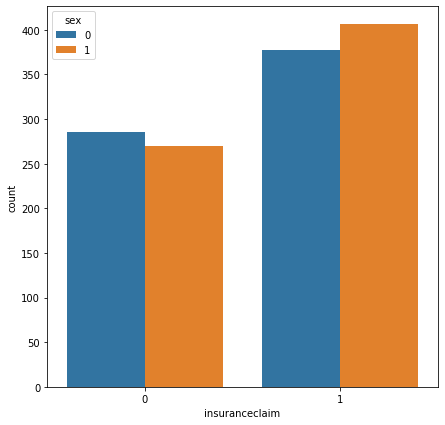

In [6]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="insuranceclaim",hue="sex")
plt.show()

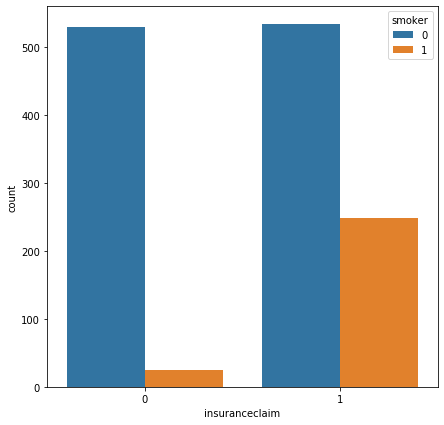

In [7]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="insuranceclaim",hue="smoker")
plt.show()

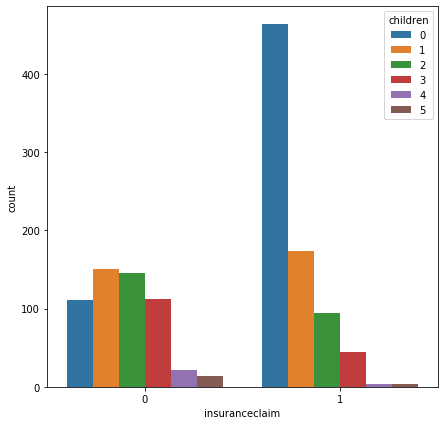

In [8]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="insuranceclaim",hue="children")
plt.show()

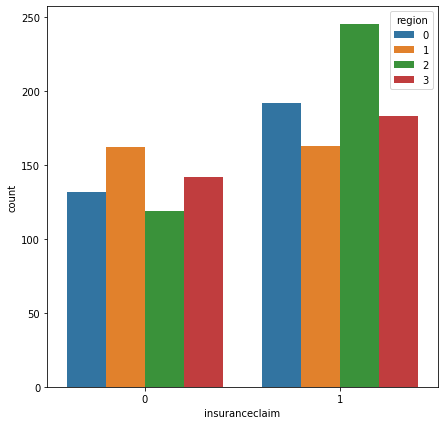

In [9]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x="insuranceclaim",hue="region")
plt.show()

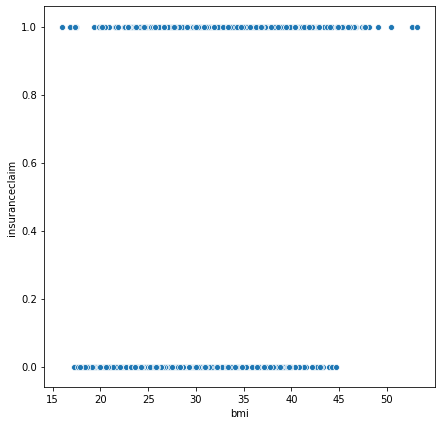

In [10]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x="bmi",y="insuranceclaim")
plt.show()

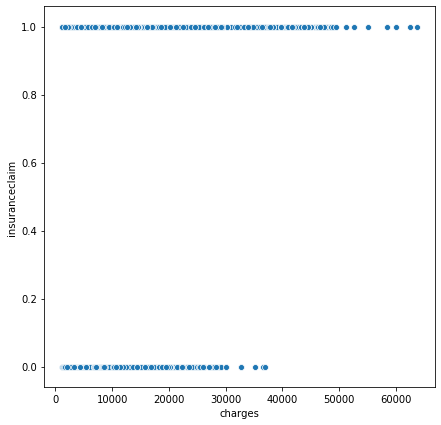

In [11]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x="charges",y="insuranceclaim")
plt.show()

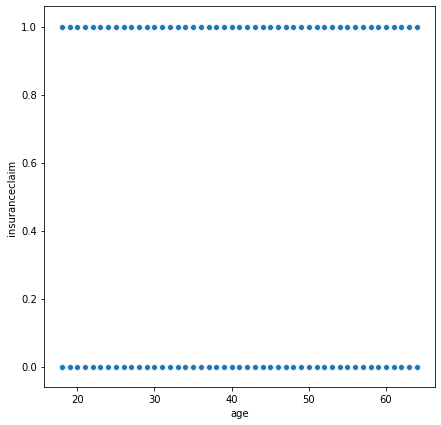

In [12]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x="age",y="insuranceclaim")
plt.show()

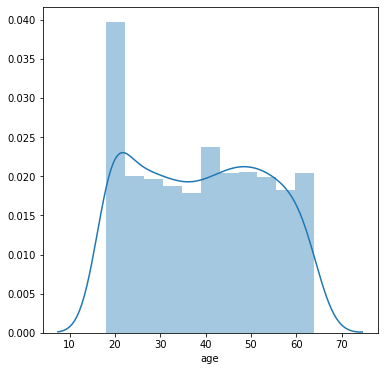

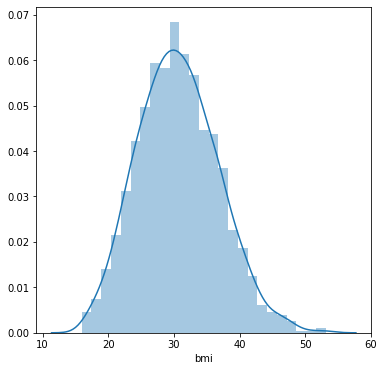

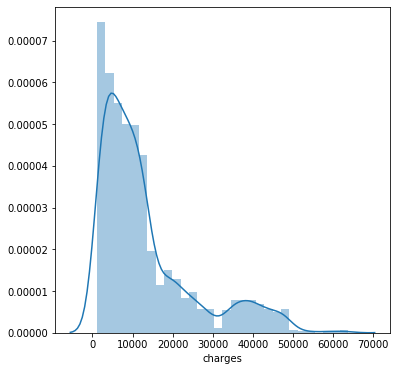

In [13]:
cols = ["age","bmi","charges"]

for col in cols:
    plt.figure(figsize=(6,6))
    sns.distplot(df[col])
    plt.show()

    

In [14]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [16]:
lr = LogisticRegression()

In [17]:
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8134328358208955

In [18]:
y_pred = lr.predict(X_test)
print(y_pred)

[1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1
 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1
 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0
 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0
 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1
 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1
 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       157
           1       0.83      0.87      0.85       245

    accuracy                           0.81       402
   macro avg       0.81      0.80      0.80       402
weighted avg       0.81      0.81      0.81       402



In [21]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tp, fp)
print(fn, tn)

214 44
31 113


In [22]:
dt = DecisionTreeClassifier()

In [23]:
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.9850746268656716

[Text(135.11935975609757, 207.55636363636364, 'X[2] <= 25.983\ngini = 0.485\nsamples = 1338\nvalue = [555, 783]'),
 Text(44.91219512195122, 187.7890909090909, 'X[4] <= 0.5\ngini = 0.333\nsamples = 317\nvalue = [250, 67]'),
 Text(24.49756097560976, 168.0218181818182, 'X[2] <= 17.575\ngini = 0.134\nsamples = 250\nvalue = [232, 18]'),
 Text(16.33170731707317, 148.25454545454545, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(32.66341463414634, 148.25454545454545, 'X[2] <= 25.332\ngini = 0.079\nsamples = 242\nvalue = [232, 10]'),
 Text(16.33170731707317, 128.48727272727274, 'X[2] <= 25.127\ngini = 0.01\nsamples = 200\nvalue = [199, 1]'),
 Text(8.165853658536586, 108.72, 'gini = 0.0\nsamples = 189\nvalue = [189, 0]'),
 Text(24.49756097560976, 108.72, 'X[3] <= 1.5\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(16.33170731707317, 88.95272727272729, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(32.66341463414634, 88.95272727272729, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 T

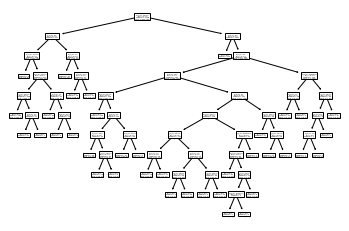

In [24]:
tree.plot_tree(dt.fit(X,y)) 

#### Decision Tree with max_depth

In [25]:
dt2 = DecisionTreeClassifier(max_depth=5)

In [26]:
dt2.fit(X_train,y_train)
dt2.score(X_test,y_test)

0.9104477611940298

In [27]:
y_pred = lr.predict(X_test)
print(y_pred)

[1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1
 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1
 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0
 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0
 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1
 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1
 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [28]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tp, fp)
print(fn, tn)

214 44
31 113


#### Decision Tree with min_sample_leaf

In [29]:
dt3 = DecisionTreeClassifier(min_samples_leaf=90)

In [30]:
dt3.fit(X_train,y_train)
dt3.score(X_test,y_test)

0.8159203980099502

[Text(152.1818181818182, 199.32, 'X[2] <= 25.983\ngini = 0.485\nsamples = 1338\nvalue = [555, 783]'),
 Text(91.30909090909091, 163.07999999999998, 'X[6] <= 13670.915\ngini = 0.333\nsamples = 317\nvalue = [250, 67]'),
 Text(60.872727272727275, 126.83999999999999, 'X[3] <= 0.5\ngini = 0.123\nsamples = 227\nvalue = [212, 15]'),
 Text(30.436363636363637, 90.6, 'gini = 0.056\nsamples = 105\nvalue = [102, 3]'),
 Text(91.30909090909091, 90.6, 'gini = 0.177\nsamples = 122\nvalue = [110, 12]'),
 Text(121.74545454545455, 126.83999999999999, 'gini = 0.488\nsamples = 90\nvalue = [38, 52]'),
 Text(213.05454545454546, 163.07999999999998, 'X[3] <= 0.5\ngini = 0.419\nsamples = 1021\nvalue = [305, 716]'),
 Text(182.61818181818182, 126.83999999999999, 'gini = 0.0\nsamples = 436\nvalue = [0, 436]'),
 Text(243.4909090909091, 126.83999999999999, 'X[4] <= 0.5\ngini = 0.499\nsamples = 585\nvalue = [305, 280]'),
 Text(213.05454545454546, 90.6, 'X[0] <= 40.5\ngini = 0.463\nsamples = 469\nvalue = [298, 171]'),


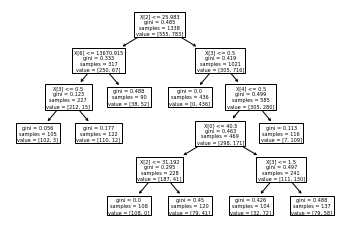

In [31]:
tree.plot_tree(dt3.fit(X,y),fontsize=5) 

In [32]:
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
dt4 = DecisionTreeClassifier(criterion="entropy")

In [34]:
dt4.fit(X_train,y_train)
dt4.score(X_test,y_test)

0.9850746268656716

[Text(135.64410211267605, 209.07692307692307, 'X[2] <= 25.983\nentropy = 0.979\nsamples = 1338\nvalue = [555, 783]'),
 Text(37.72394366197183, 192.35076923076923, 'X[4] <= 0.5\nentropy = 0.744\nsamples = 317\nvalue = [250, 67]'),
 Text(18.861971830985915, 175.62461538461537, 'X[2] <= 17.575\nentropy = 0.373\nsamples = 250\nvalue = [232, 18]'),
 Text(9.430985915492958, 158.89846153846153, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(28.292957746478873, 158.89846153846153, 'X[2] <= 25.127\nentropy = 0.248\nsamples = 242\nvalue = [232, 10]'),
 Text(18.861971830985915, 142.1723076923077, 'entropy = 0.0\nsamples = 189\nvalue = [189, 0]'),
 Text(37.72394366197183, 142.1723076923077, 'X[3] <= 1.5\nentropy = 0.699\nsamples = 53\nvalue = [43, 10]'),
 Text(28.292957746478873, 125.44615384615385, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(47.154929577464785, 125.44615384615385, 'X[6] <= 7401.968\nentropy = 0.779\nsamples = 13\nvalue = [3, 10]'),
 Text(37.72394366197183, 108.72

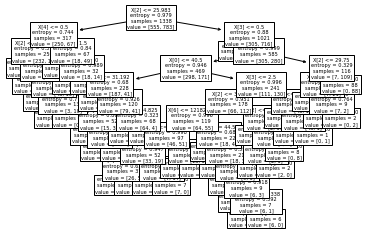

In [35]:
tree.plot_tree(dt4.fit(X,y),fontsize=5) 